<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:2- Stationarity</center></h1></u>
<br>

### Welcome back guys!! This is the 2nd assignment of the time series analysis module.

![2.1.png](https://t4.ftcdn.net/jpg/02/28/95/91/360_F_228959181_1N9F5FyumnprJ7MX23XkBcJCRwrRCv33.jpg)

In this assignment you will be learning about stationarity in time series analysis.

<u>Table of contents:</u><br>


1.   What is a Stationary Series?
2.   How to check Stationarity?
     * Visualization
     * Augmented Dickey Fuller test
     * Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


So without wasting time lets start learning!!

<h1><u>What is a Stationary Series?</h1></u>
A stationary series is one whose statistical features, such as mean, variance, and covariance, do not change with time or are not time dependent. In other terms, in Time Series, stationarity also refers to series that lack Trend or Seasonal components. Statistical models can more effectively and precisely anticipate stationary series. In time series, the term "stationary" is particularly significant. Because a model cannot forecast on non-stationary time series data, the first step in ARIMA time series forecasting is to identify the number of differencing required to make the series stationary.

![2.2.png](https://i.imgur.com/3lKCxEn.png)

### Refer to the video given below

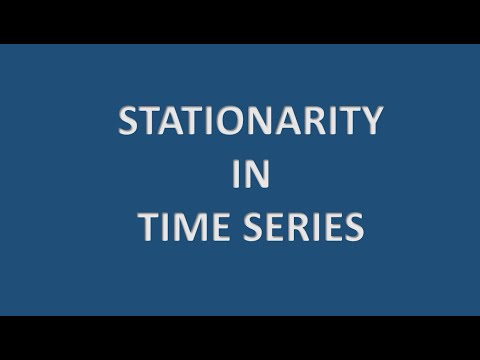

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('5TpRcY5ogDI', width=700, height=400)

<b>Types of Stationary Series</b>
1. <b>Strict Stationary </b>– Satisfies the mathematical definition of a stationary
process and mean, variance & covariance are not the function of time.
2. <b>Seasonal Stationary</b> – Series exhibiting seasonality.
3. <b>Trend Stationary </b>– Series exhibiting trend.<br><br>
<b>Note:</b> Once the seasonality and trend is removed, series will be strict stationary

![2.4.png](https://miro.medium.com/max/1400/1*tkx0_wwQ2JT7pSlTeg4yzg.png)

<h2><u>How to check Stationarity?</h2></u>
Well moving ahead, in this part you are going to see three methods to check stationarity, two of which are very commonly used statistical methods.

1. <b>Visualizations:</b>
Plotting the data and visually checking for trend and seasonal components are the most basic ways for detecting stationarity. Trying to tell if a time series was formed by a stationary process solely by looking at its plot is a risky proposition. There are, nevertheless, some fundamental aspects of non-stationary data that we may look for.
Take the following excellent graphs from [Hyndman & Athanasopoulos, 2018](https://otexts.com/fpp2/stationarity.html) as an example:

![2.5.png](https://miro.medium.com/max/768/0*Ja-FJ47hkBT-Azib.png)

<br>


*   Seasonality can be observed in series (d), (h), and (i)<br>
*   The trend can be observed in series (a), (c), (e), (f), and (i)
*   Series (b) and (g) are stationary

Now lets understand this with some practical implementation. Lets start by importing some libraries.

* numpy: for array and matrix operations
* pandas: for storing and analysing data
* matplotlib: plotting graphs

In [2]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [3]:
# import drive from google.colab
import google.colab

# mount the drive
google.colab.drive.mount('/content/drive')


Mounted at /content/drive


Next, load the datasets using read_csv method of pandas in the df and df1 variable.

Download the datasets from the given link and upload it in your drive. https://drive.google.com/file/d/1moFys70x4_XBoLCM33Xx25t4JCwezs-D/view?usp=sharing and https://drive.google.com/file/d/1hmig3_aqjdgJmbWORrXoykTw_NoxUO5g/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The date column is set as the index column. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. The first dataset has two columns date and values(sales of drugs). The values of sales of drugs are seperately stored in the series variable using the loc function. Plot the data having figure size 14,8 and title 'Drug Sales Series'. The second dataset contains two columns date and births. The values of births are seperately stored in the series1 variable using the loc function. Plot the data having figure size 14,8 and title 'Daily total births'.

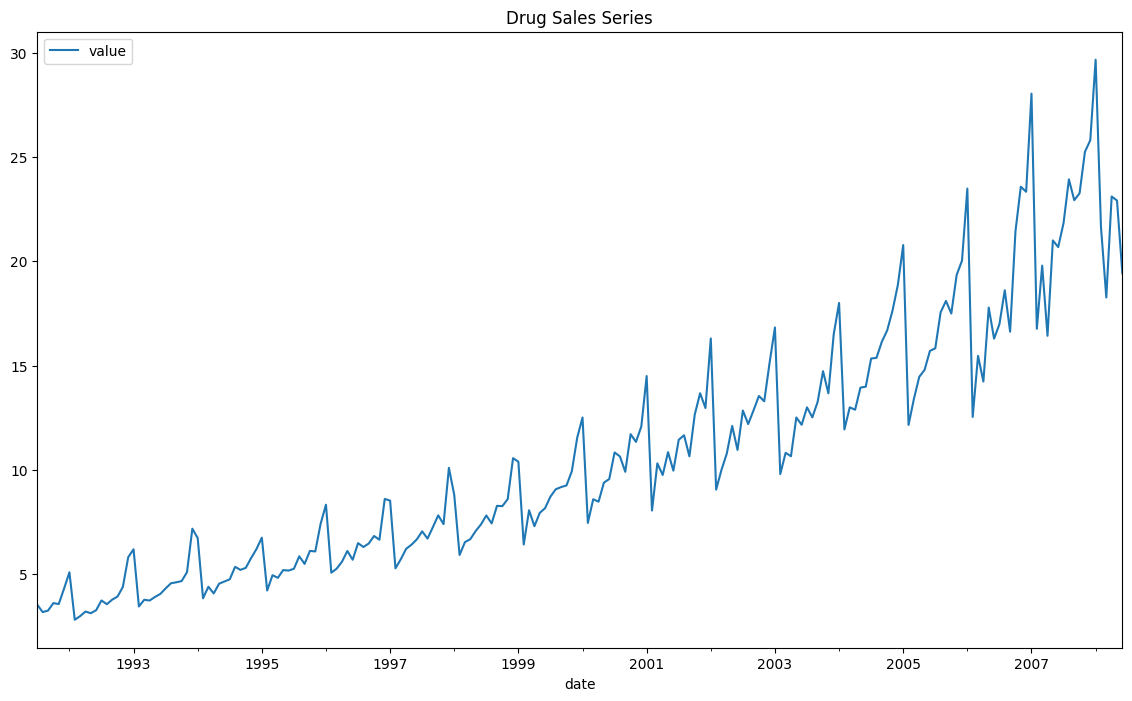

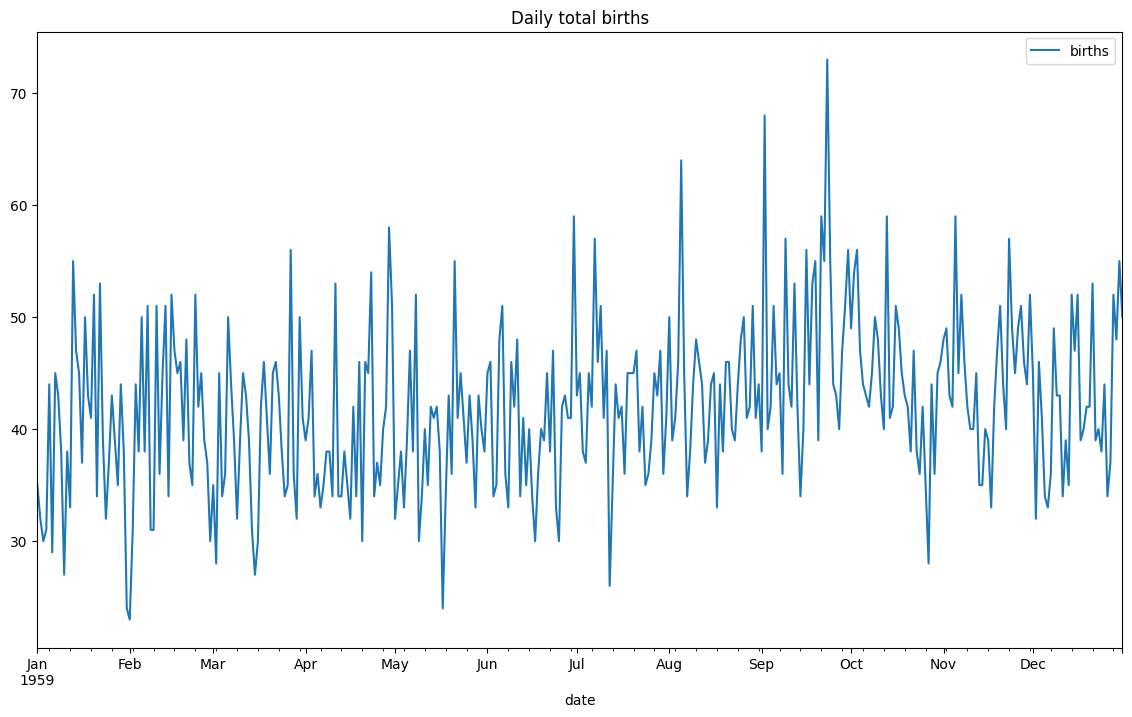

In [9]:
# copy the dataset path
url='/content/drugs.csv'

# copy the dataset path
url1='/content/daily-total-female-births-CA.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col='date')

# read tha second dataset
df1 = pd.read_csv(url1, parse_dates=['date'], index_col='date')
#series=df.loc[:,'values']
#series1=df1.loc[:,'births']

# plot the first dataset
df.plot(figsize=(14,8),title='Drug Sales Series')

# seperate 'values' from first dataset
#series=df.loc[:,'values']

# plot the second dataset
df1.plot(figsize=(14,8),title='Daily total births')

# seperate 'births' from second dataset
series1=df1.loc[:,'births']



From the above plots, we can see that the first dataset which is drug sales data is not stationary as the mean and variance is constantly changing, also it has an increasing trend and seasonality. The second dataset which is daily total births in contrary has almost constant mean and variance. Hence it is stationary data.

<b><u>Statistical methods</b></u>

2. <b>Augmented Dickey-Fuller Test</b>

The first stage in ARIMA time series forecasting is to figure out how many differencings are needed to make the series stationary. Because verifying the stationarity of a time series is a common activity in autoregressive models, you should be familiar with the ADF test and the KPSS test while performing time series analysis.

![2.6.png](https://i.ytimg.com/vi/1opjnegd_hA/mqdefault.jpg)

* <b><u>What is a Unit Root Test?</b></u>

The ADF test belongs to the 'Unit Root Test' group of tests, which is the right approach for testing a time series stationarity. So, what exactly is a 'Unit Root'? A time series unit root is a feature that renders it non-stationary. In the following equation, a unit root is said to exist in a time series of the value of alpha = 1.

![2.7.png](https://www.machinelearningplus.com/wp-content/uploads/2019/11/equation_1.png)

Yt is the time series' value at time 't', while Xe is an exogenous variable (a separate explanatory variable, which is also a time series). Y(t-1) is the time series at time t-1 and E is the error term. So, what does this imply for us? A unit root indicates that the time series is non-stationary. Furthermore, the number of unit roots in the series equals the number of differencing operations needed to make the series stationary.
### Watch the video given below to understand about unit root test clearly


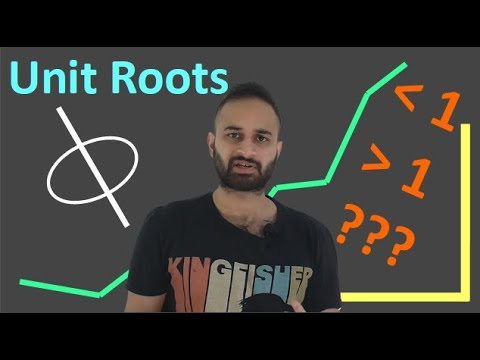

In [10]:
YouTubeVideo('ugOvehrTRRw', width=700, height=400)

Get to know whats null hypothesis: https://www.investopedia.com/terms/n/null_hypothesis.asp

* <b><u>Dickey-Fuller Test</b></u>

Let's first define the Dickey-Fuller test before moving on to the ADF test. The Dickey-Fuller test is a unit root test that examines the null hypothesis that in the following model equation, α=1. The initial lag coefficient on Y is alpha. <br>Null Hypothesis (H0): alpha=1.

![2.8.png](https://www.machinelearningplus.com/wp-content/uploads/2019/11/equation_2.png)
where,

y(t-1) = lag 1 of time series<br>
delta Y(t-1) = first difference of the series at time (t-1)

It has a null hypothesis that is comparable to the unit root test. That is, Y(t-1) has a coefficient of 1, indicating the presence of a unit root. If the series is not rejected, it is assumed to be non-stationary. The Augmented Dickey-Fuller test, which is based on the equation above, is one of the most used Unit Root tests.

<br>

* <b><u>How does Augmented Dickey Fuller (ADF) Test work?</b></u>
The ADF test is a 'enhanced' version of the Dickey Fuller test, as the name implies. The ADF test adds a high-order regressive process to the Dickey-Fuller test equation.

![2.9.png](https://www.machinelearningplus.com/wp-content/uploads/2019/11/equation_3.png)

You'll see that we've merely added new differencing terms, leaving the rest of the equation same. This increases the test's thoroughness. The null hypothesis, on the other hand, is unchanged from the Dickey Fuller test. The p-value obtained should be smaller than the significance level (say 0.05) in order to reject the null hypothesis, because the null hypothesis implies the presence of unit root, that is, 1. As a result, the series is said to be stationary. This is, however, a relatively common blunder analysts make with this test. People wrongly believe the series is non-stationary if the p-value is less than the significance level.

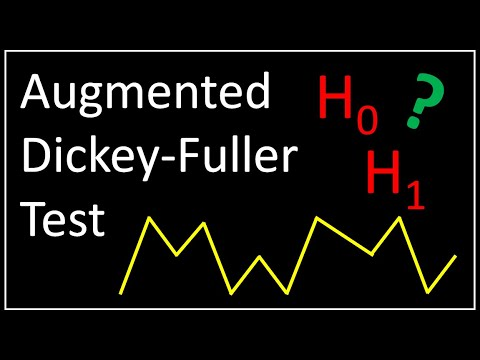

In [11]:
YouTubeVideo('1opjnegd_hA', width=700, height=400)

## Refer the given documentation :
https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

* <b><u>ADF Test in Python</b></u>

So, how to perform an Augmented Dickey-Fuller test in Python?
The statsmodels package provides a reliable implementation of the ADF test via the adfuller() function in statsmodels.tsa.stattools. It returns the following outputs:

1. The p-value<br> read more:https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html
2. The value of the test statistic
<br>know what is test statistic: https://www.scribbr.com/statistics/test-statistic/
3. Number of lags considered for the test ( number of previous time observations)
4. The critical value cut-offs.
<br> read more:https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html

<br>
When the test statistic is lower than the critical value shown, you reject the null hypothesis(data is not stationary) and infer that the time series is stationary.

Refer the given below video to get an idea about the implementation.

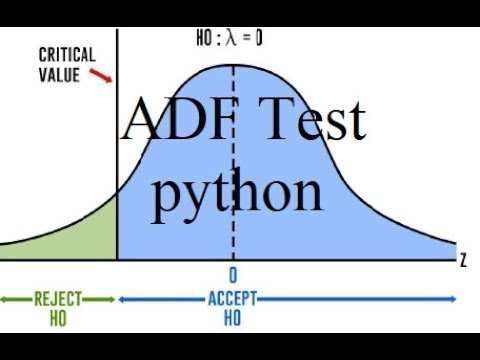

In [12]:
YouTubeVideo('bsyUn-LJ3YQ', width=700, height=400)

Lets start by importing some libraries.<br>


1.   numpy: for array and matrix operations
2.   pandas: for storing and analysing data
3.   statsmodel: providing statistical models and tests
4.   matplotlib: plotting graphs



In [13]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [15]:
# import drive from google.colab
import google.colab

# mount the drive
google.colab.drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1moFys70x4_XBoLCM33Xx25t4JCwezs-D/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The date column is set as the index column. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. The dataset has two columns date and values(sales of drugs). The values of sales of drugs are seperately stored in the series variable using the loc function. Plot the data having figure size 14,8 and title 'Drug Sales Series'.

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


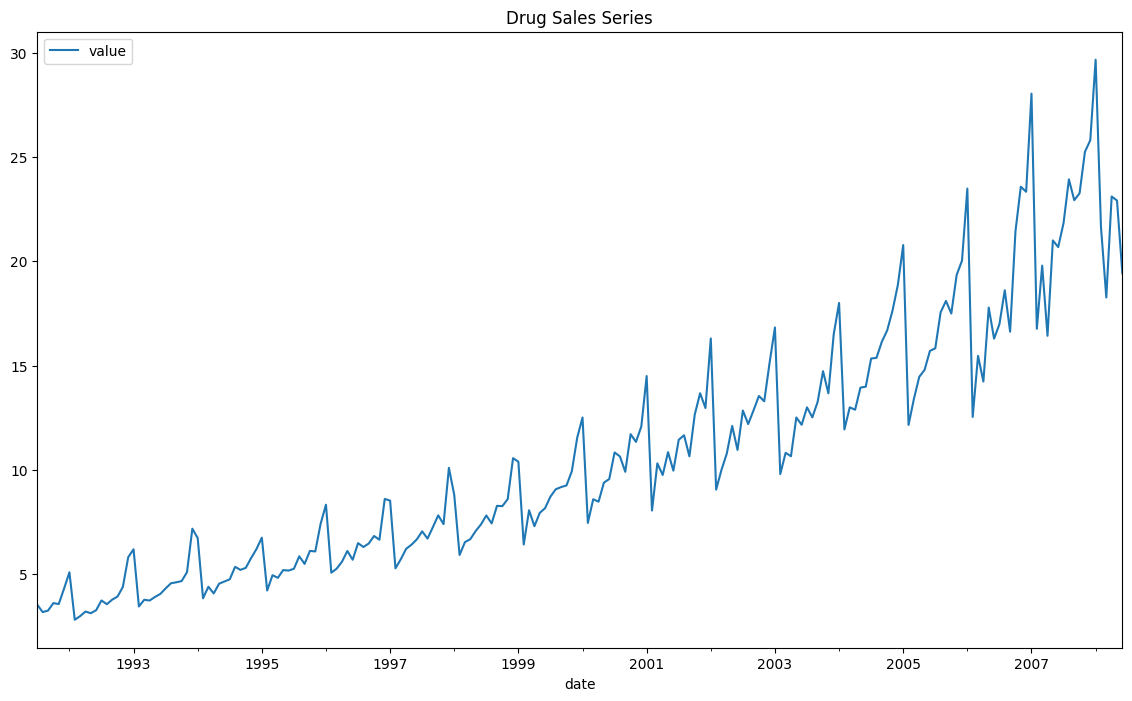

In [18]:
# copy the dataset path
url='/content/drugs.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col='date')

# seperate 'values' from the dataset
series = df.loc[:, 'value'].values

# plot the dataset
df.plot(figsize=(14,8), title='Drug Sales Series'); df.head()
#series.plot(figsize=(14,8),title='Drug Sales Series')


Check the first 5 rows using the head() function.

In [19]:
# Check the first 5 rows using the head() function.
df.head()


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Now we will implement the ADF test. The packages and the data is loaded, we have everything needed to perform the test using adfuller(). An optional argument the adfuller() accepts is the number of lags you want to consider while performing the OLS regression. By default, this value is 12*(nobs/100)^{1/4}, where nobs is the number of observations in the series. But, optionally you can specify either the maximum number of lags with maxlags parameter or let the algorithm compute the optimal number iteratively. This can be done by setting the autolag='AIC'. By doing so, the adfuller will choose a the number of lags that yields the lowest AIC.

In [21]:
# ADF Test
# Import adfuller from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

# create object for adfuller class
result = adfuller(series)

# print test statistic (0th index)
print('Test Statistic: ', result[0])

# print p value (1st index)
print('p-value: ', result[1])

# print no. of lags (2nd index)
print('No. of lags: ', result[2])

# run for loop iterating through items of result[3]
#for key, value in result[4].items():
#    print('Critical Value (%s): %f' % (key, value))

# print number of observations (3rd index)
print('Number of observations: ', result[3])

# run for loop iterating through items of result[4]
for key, value in result[4].items():
# print the critical values
    print('Critical Value (%s): %f' % (key, value))



Test Statistic:  3.14518568930673
p-value:  1.0
No. of lags:  15
Number of observations:  188
Critical Value (1%): -3.465620
Critical Value (5%): -2.877040
Critical Value (10%): -2.575032


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

### Well done people, you've come quite far.

![](https://indianmenopausesociety.org/wp-content/uploads/2019/01/WellDone-001.jpg)

### Let's move ahead with the next method for checking stationarity.

3. <b><u>Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test</b></u>

The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend. A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary. So practically, the interpretation of p-value is just the opposite to each other.

<b>That is, if p-value is < significance level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary.</b>

KPSS test is conducted with the following assumptions.<br>
<b>Null Hypothesis (HO):</b> Series is trend stationary or series has no unit root.
<b>Alternate Hypothesis(HA):</b> Series is non-stationary or series has a unit root.

<b>Note:</b> Hypothesis is reversed in KPSS test compared to ADF Test.

<br>

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.



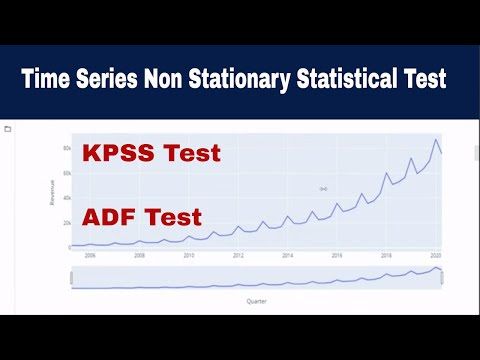

In [22]:
YouTubeVideo('YNm0h-qZo9g', width=700, height=400)


## Refer the given documentation:
https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

Lets start by importing some libraries.

1. numpy: for array and matrix operations
2. pandas: for storing and analysing data
3. statsmodel: providing statistical models and tests
4. matplotlib: plotting graphs

In [23]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1moFys70x4_XBoLCM33Xx25t4JCwezs-D/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The date column is set as the index column. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. The dataset has two columns date and values(sales of drugs). The values of sales of drugs are seperately stored in the series variable using the loc function. Plot the data having figure size 14,8 and title 'Drug Sales Series'.

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


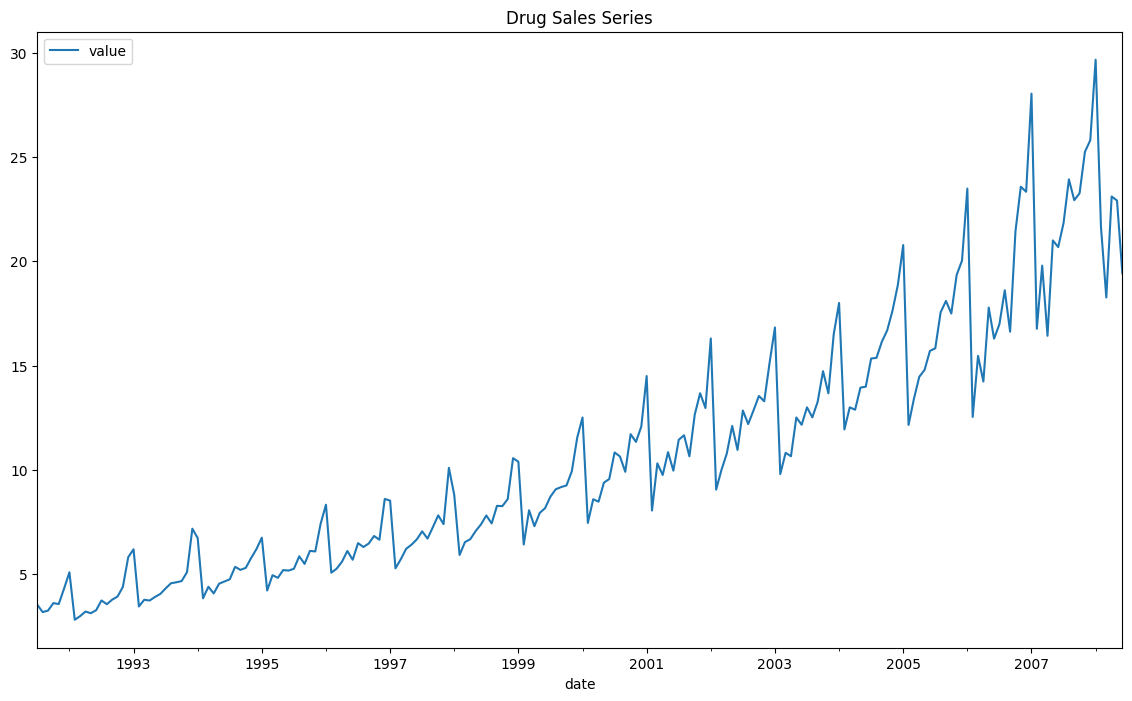

In [24]:
# copy the dataset path
url='/content/drugs.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col='date')

# seperate 'values' from the dataset
series = df.loc[:, 'value'].values

# plot the dataset
df.plot(figsize=(14,8), title='Drug Sales Series'); df.head()


Now we will perform the KPSS test. Import kpss from statsmodels.tsa.stattools. Create the kpss_result object of the kpss class.Print the kpss statistic,p value, no. of lags and criticical values. Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html

In [26]:
# KPSS Test
# Import kpss from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import kpss

# create object for kpss class
kpss_result = kpss(series)

# print test statistic (0th index)
print('Test Statistic: ', kpss_result[0])

# print p value (1st index)
print('p-value: ', kpss_result[1])

# print no. of lags (2nd index)
print('No. of lags: ', kpss_result[2])

# run for loop iterating through items of result[3]
for key, value in kpss_result[3].items():
    print('Critical Value (%s): %f' % (key, value))

    # print the critical values


Test Statistic:  2.0131256386303322
p-value:  0.01
No. of lags:  9
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


<ipython-input-26-dadad76fb9be>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)


<h3><u>How to interpret KPSS test results</h3></u>
The output of the KPSS test contains 4 things:

1. The KPSS statistic
2. p-value
3. Number of lags used by the test
4. Critical values

The test's p-value is a probability score that you can use to decide whether or not to reject the null hypothesis. We reject the null hypothesis if the p-value is less than a predetermined alpha level (usually 0.05).
The test statistic must be greater than the stated crucial values in order to reject the null hypothesis. If it is indeed larger than the target critical value, the p-value should be low. Finally, the number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test.

* Test Statistic is 1.3136
* Critical Value (5%) is 0.463
* p-value is 0.01

Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.

### Hence we conclude series is non-stationary

So guys, you have succesfully completed this assignment. Hope you understood the concepts, if not then do not hestitate to look back again at it. We learnt about stationarity in time series data and methods to check them. Keep practising until next assignment comes in. <br><br>
## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![2.11.png](https://memegenerator.net/img/instances/84407792.jpg)